# EDA Utilities

In this section, we will introduce a rich set of plotting functions in orbit for the EDA (exploratory data analysis) purpose. The plots include 

* Time series heatmap
* Correlation heatmap
* Dual axis time series plot
* Wrap plot

In [6]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np

import orbit
from orbit.utils.dataset import load_iclaims
from orbit.eda import eda_plot

In [8]:
df = load_iclaims()
df['week'] = pd.to_datetime(df['week'])

In [9]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


## Time series heat map

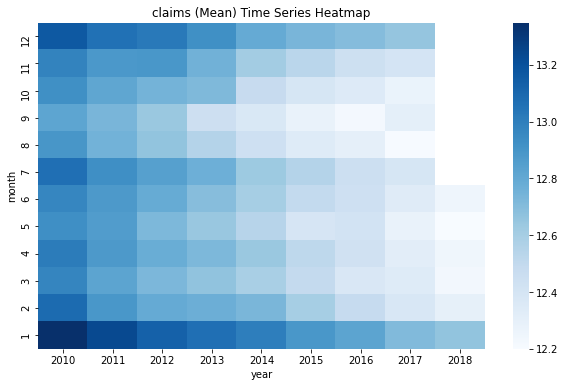

In [5]:
eda_plot.ts_heatmap(df = df, date_col = 'week', value_col='claims', export_fig=False)

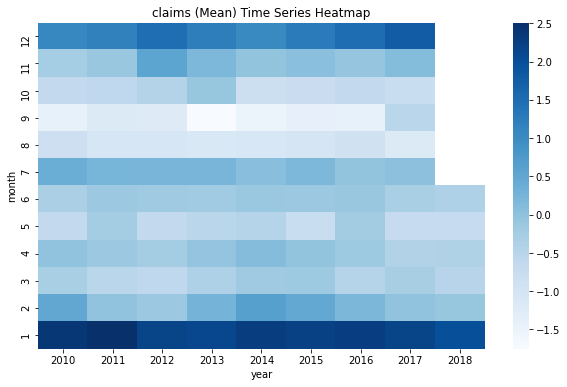

In [6]:
eda_plot.ts_heatmap(df = df, date_col = 'week', value_col='claims', normalization=True)

## Correlation heatmap

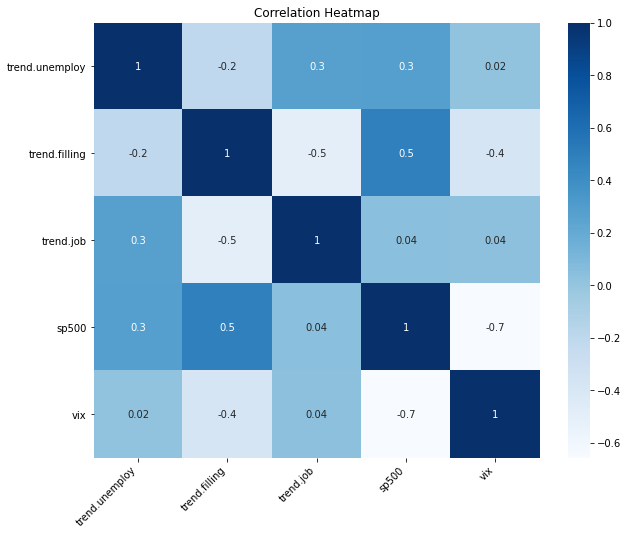

In [7]:
var_list = ['trend.unemploy', 'trend.filling', 'trend.job', 'sp500', 'vix']
eda_plot.correlation_heatmap(df, var_list = var_list, fig_width=10, fig_height=8, export_fig=False)

## Year over Year Outcome vs Events Time Series Plot

In [12]:
holiday = [['12/25/15', 'h_christmas'], ['12/25/16', 'h_christmas'], 
           ['12/25/17', 'h_christmas'], ['11/22/15', 'h_thanksgiving'], 
           ['11/28/16', 'h_thanksgiving'], ['11/26/17', 'h_thanksgiving'],
           ['7/4/15', 'h_independence'], ['7/4/16', 'h_independence'], 
           ['7/4/17', 'h_independence']]

holiday_df = pd.DataFrame(holiday,columns=['week', 'holiday_name'])
holiday_df['week'] = pd.to_datetime(holiday_df['week'])

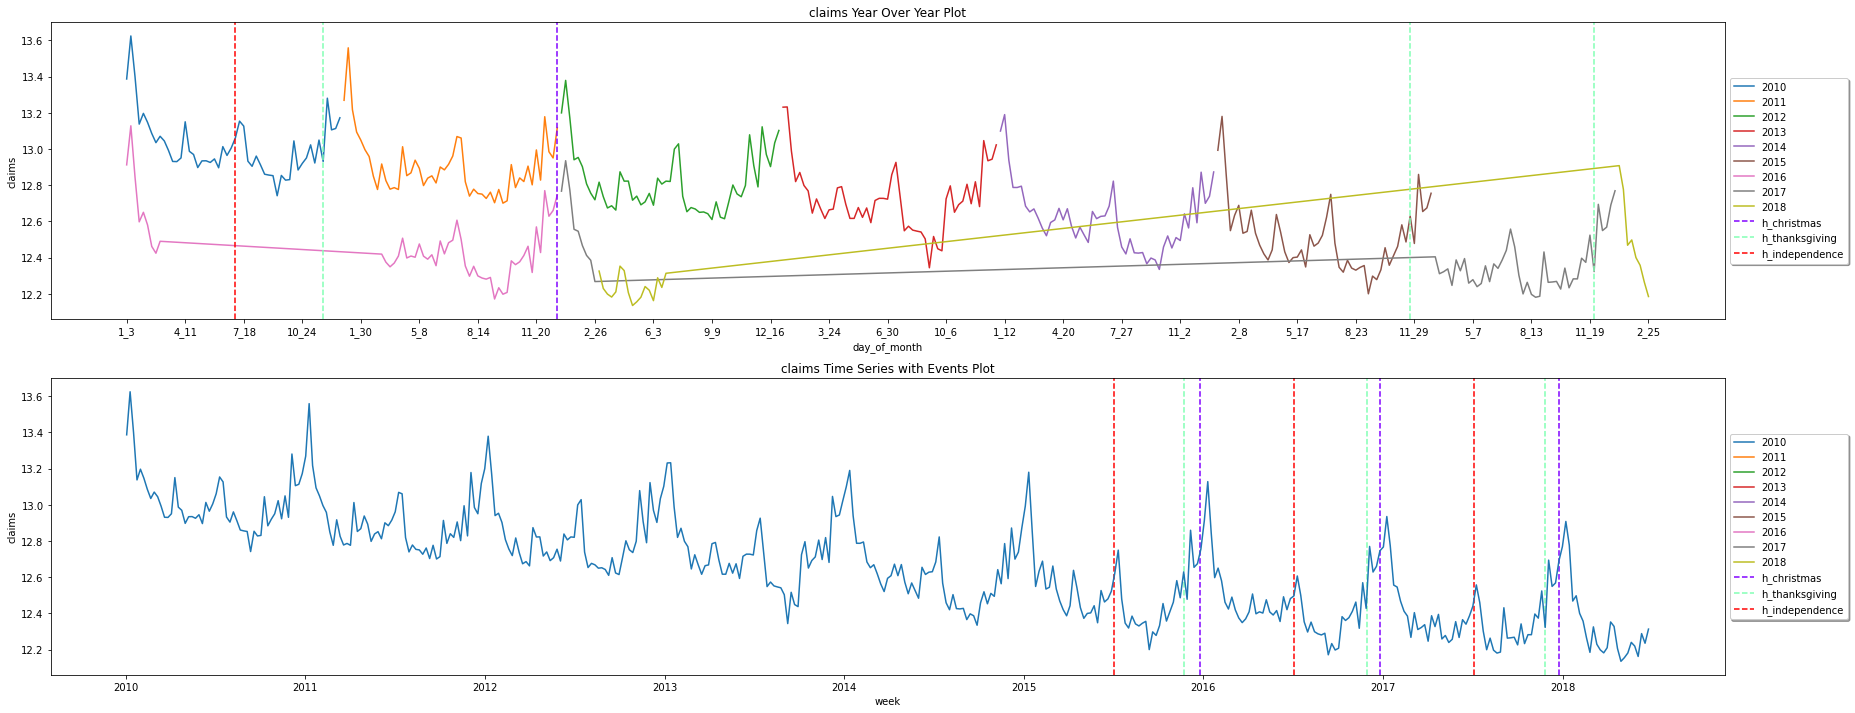

In [14]:
eda_plot.year_over_year_ts_plot(df=df, date_col='week', outcome='claims', 
                                event_df=holiday_df, event_col = 'holiday_name', 
                                export_fig=False)

## Dual axis time series plot 

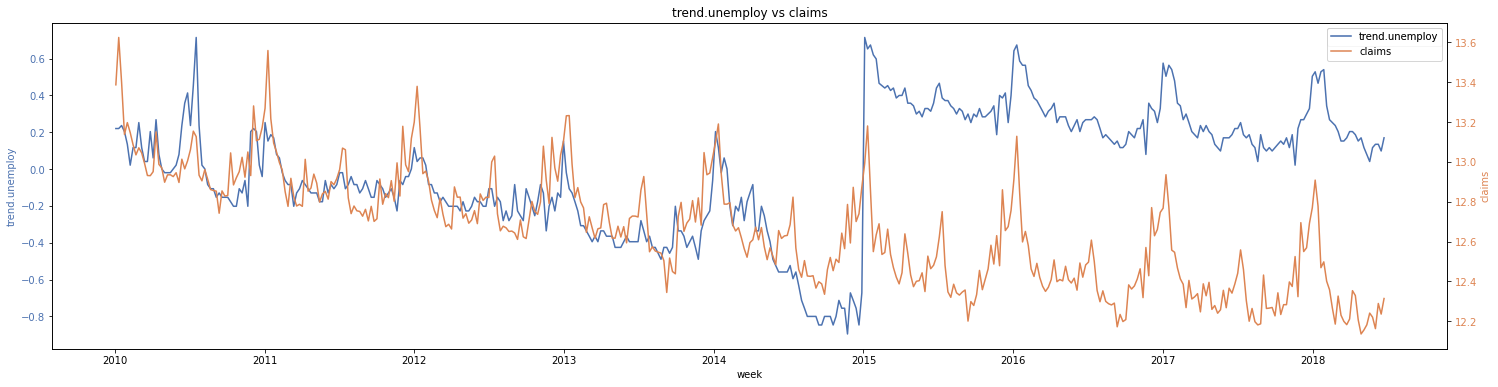

In [8]:
eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week')

## Wrap plots for quick glance of data patterns

In [9]:
var_list=['week', 'trend.unemploy', 'trend.filling', 'trend.job', 'sp500', 'vix']   
df[var_list].melt(id_vars = ['week'])

,week,variable,value
0,2010-01-03,trend.unemploy,0.219882
1,2010-01-10,trend.unemploy,0.219882
2,2010-01-17,trend.unemploy,0.236143
3,2010-01-24,trend.unemploy,0.203353
4,2010-01-31,trend.unemploy,0.134360
...,...,...,...
2210,2018-05-27,vix,-0.175192
2211,2018-06-03,vix,-0.275119
2212,2018-06-10,vix,-0.291676
2213,2018-06-17,vix,-0.152422


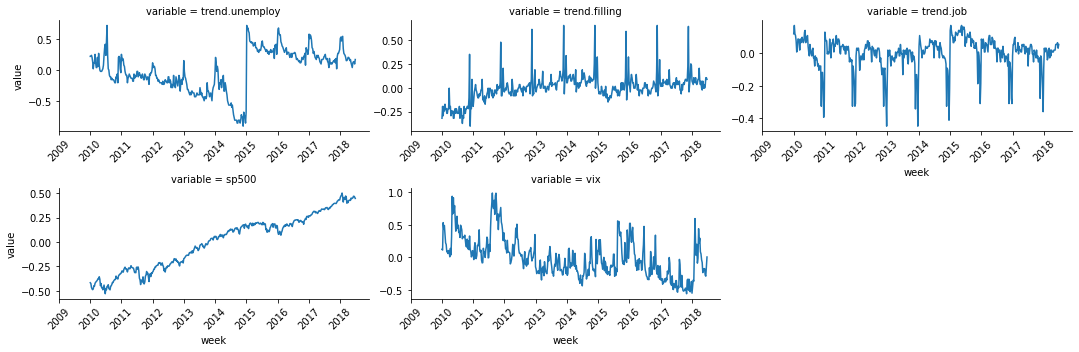

In [10]:
eda_plot.wrap_plot_ts(df, 'week', var_list)